In this notebook, we will be practising pivot tables in  Pandas. Another notebook will follow where we will talk about vlook ups.


It is important to point out that most data analysis are now performed using pandas http://pandas.pydata.org/index.html . It is faster, more robust, can handle large datasets and can codes can be written such that analysis is automated. This way more time is spent making sense of the output of the data rather than  clicking here and there like in Excel trying to generate simple plots. Pandas makes use of the python ecosystem; models can be built using statsmodels http://www.statsmodels.org/stable/index.html , predictions made on pricing, revenue and so on can be predicted uisng time series analysis https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ and a host of other forecast with the machine learning libaray in python  http://scikit-learn.org/stable/

import neccessary libaries

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Pivot tables provide us a very nice and convient way to summarize data by grouping data
in specific ways. Read more about pivot tables in pandas here http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html and pivot tables in general https://en.wikipedia.org/wiki/Pivot_table  and  https://www.techsoupcanada.ca/en/community/blog/pivot-tables

Lets read in data from  VanArsdel sales in Canada.  This data will be used to in the rest of the pivot table tutorial

In [225]:
Vand_Data=pd.ExcelFile('/home/raphael/Documents/DataSets/isVanArsdel.xlsx',sheetname=None )

Let's  find out the sheets that make up this data

In [41]:
Vand_Data.sheet_names

['Manufacturer',
 'Locations',
 'Products',
 'PivotTables',
 'Sales',
 'Dashboard - CA']

Lets see what some of sheets look like. To do this, we use the parse function http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ExcelFile.parse.html . Below I only show the first five rows. The data actually has 1411 rows.

In [52]:
Sales = Vand_Data.parse('Sales')

Sales.head(5)

,ProductID,Date,Zip,Units,Revenue,Country,Product,Category,Segment,Manufacturer,State,isVanArsdel,Month,Year
0,1924,2015-02-09,M5R,1,4409.37,Canada,Currus MA-17,Mix,All Season,Currus,Ontario,N,2,2015
1,1517,2015-05-31,R3G,1,2361.24,Canada,Quibus RP-09,Rural,Productivity,Quibus,Manitoba,N,5,2015
2,615,2015-05-31,M4V,1,8189.37,Canada,Maximus UC-80,Urban,Convenience,VanArsdel,Ontario,Y,5,2015
3,1530,2015-05-31,R3H,1,4282.74,Canada,Quibus RP-22,Rural,Productivity,Quibus,Manitoba,N,5,2015
4,1226,2015-06-01,L5P,1,6866.37,Canada,Pirum UC-28,Urban,Convenience,Pirum,Ontario,N,6,2015


In [43]:
Locations=Vand_Sales.parse("Locations")
Locations.head(5)

,Zip,State,Country
0,A0A,Newfoundland and Labrador,Canada
1,A0B,Newfoundland and Labrador,Canada
2,A0C,Newfoundland and Labrador,Canada
3,A0E,Newfoundland and Labrador,Canada
4,A0G,Newfoundland and Labrador,Canada


In [44]:
Sales.columns

Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'Country', 'Product',
       'Category', 'Segment', 'Manufacturer', 'State', 'isVanArsdel', 'Month',
       'Year'],
      dtype='object')

Lets create a pivot table showing the total sales that come from manufactured goods by each State.  

In [45]:
sales_manu_province=Sales.pivot_table(index="State",columns="isVanArsdel", values="Revenue",aggfunc=np.sum)
sales_manu_province

isVanArsdel,N,Y
State,,
Alberta,1547543.34,1415615.04
British Columbia,996666.93,1111471.83
Manitoba,728141.40,651176.82
Ontario,1733048.10,1382179.68
Quebec,126376.74,133963.20


Respectively in the above table, N and Y respresents the total sales from goods not manufactured by isVanArsdel but sold by his company and Y is the total sale from goods manufactured by isVanArsdel

# 

Now let's get the grand total 

In [46]:
sales_manu_province["Grand total"] = sales_manu_province["N"] +sales_manu_province["Y"] 
sales_manu_province.head()

isVanArsdel,N,Y,Grand total
State,,,
Alberta,1547543.34,1415615.04,2963158.38
British Columbia,996666.93,1111471.83,2108138.76
Manitoba,728141.40,651176.82,1379318.22
Ontario,1733048.10,1382179.68,3115227.78
Quebec,126376.74,133963.20,260339.94


# 

The next logical thing to do will be to get the total sales from N and Y across all provinces.

In [47]:
sum_row=sales_manu_province[["N","Y","Grand total"]].sum()
sum_row

isVanArsdel
N              5131776.51
Y              4694406.57
Grand total    9826183.08
dtype: float64

we can make this into a small table

In [48]:
df_sum=pd.DataFrame(data=sum_row).T
df_sum

isVanArsdel,N,Y,Grand total
0,5131776.51,4694406.57,9826183.08


we see that 52% of his sales come from non-manufactured products while  47% is from manufactured products

# 

 At this point, we don't need isVanArsdel on the column index anymore. Lets get rid of it

In [49]:
df_sum.columns.name=None
df_sum

,N,Y,Grand total
0,5131776.51,4694406.57,9826183.08


In [98]:
Sales["Segment"].head(10)

0      All Season
1    Productivity
2     Convenience
3    Productivity
4     Convenience
5           Youth
6     Convenience
7           Youth
8     Convenience
9           Youth
Name: Segment, dtype: object

In [99]:
Sales["Segment"].tail(10)

1402     Convenience
1403         Extreme
1404     Convenience
1405     Convenience
1406    Productivity
1407           Youth
1408     Convenience
1409     Convenience
1410     Convenience
1411         Extreme
Name: Segment, dtype: object

From the first and last 10rows, we see that the Segment column is made up of a couple of entries. Lets's check see what entries make up the column and how many times each entry occur

In [100]:
Sales["Segment"].value_counts()

Convenience     403
Moderation      304
Productivity    246
Extreme         242
Youth            94
Select           49
All Season       43
Regular          31
Name: Segment, dtype: int64

Indeed there are other entries in the columns bringing them to a total of 8 with goods from  convenience  having the most number entris-a total of 403 entries(or rows).

Now we know the segments of each manufactured goods, it is only logical to know the sales from each segement.

In [108]:
Sales_by_Segments=Sales.pivot_table(index="Segment", columns=["isVanArsdel"],values="Revenue",aggfunc=np.sum)
Sales_by_Segments

isVanArsdel,N,Y
Segment,,
All Season,204985.62,NaN
Convenience,1368672.48,1581585.39
Extreme,1465621.92,83817.72
Moderation,874235.88,3009316.59
Productivity,673778.70,NaN
Regular,161355.60,NaN
Select,181307.07,19686.87
Youth,201819.24,NaN


Note that NaN means there is no data for that entry. This means  for such segments, isVanArsdel only sells products manufactured by other companies. There are ways to treat this nuisance; however, for now lets leave it there.


Again lets get the Grand total

In [109]:
Sales_by_Segments["Grand total"] = Sales_by_Segments["N"] +Sales_by_Segments["Y"] 
Sales_by_Segments

isVanArsdel,N,Y,Grand total
Segment,,,
All Season,204985.62,NaN,NaN
Convenience,1368672.48,1581585.39,2950257.87
Extreme,1465621.92,83817.72,1549439.64
Moderation,874235.88,3009316.59,3883552.47
Productivity,673778.70,NaN,NaN
Regular,161355.60,NaN,NaN
Select,181307.07,19686.87,200993.94
Youth,201819.24,NaN,NaN


Interestingly, even though convience had the most entry, it doesn't account for the most sales.

# 

If for any reason, you want to investigate a subset of the dataset, it is very easy to do so. For example, if I want to further take a look at the Regular entry in the segement column, the code below will let you do so.

In [112]:
Sales[Sales['Segment']=='Regular']

,ProductID,Date,Zip,Units,Revenue,Country,Product,Category,Segment,Manufacturer,State,isVanArsdel,Month,Year
28,244,2015-05-27,L5N,1,7556.85,Canada,Fama UR-16,Urban,Regular,Fama,Ontario,N,5,2015
51,2143,2015-04-06,M7Y,1,5291.37,Canada,Victoria UR-19,Urban,Regular,Victoria,Ontario,N,4,2015
222,229,2015-03-10,T5J,1,7241.85,Canada,Fama UR-01,Urban,Regular,Fama,Alberta,N,3,2015
346,2145,2015-03-12,L5G,1,4850.37,Canada,Victoria UR-21,Urban,Regular,Victoria,Ontario,N,3,2015
360,253,2015-03-13,M6G,1,8816.85,Canada,Fama UR-25,Urban,Regular,Fama,Ontario,N,3,2015
372,1145,2015-06-30,M6H,1,4031.37,Canada,Pirum UR-02,Urban,Regular,Pirum,Ontario,N,6,2015
522,1145,2015-01-28,L5R,1,4031.37,Canada,Pirum UR-02,Urban,Regular,Pirum,Ontario,N,1,2015
541,240,2015-01-16,V5M,1,5528.25,Canada,Fama UR-12,Urban,Regular,Fama,British Columbia,N,1,2015
543,1145,2015-03-31,V6E,1,4031.37,Canada,Pirum UR-02,Urban,Regular,Pirum,British Columbia,N,3,2015
569,1763,2015-01-01,T6G,1,5669.37,Canada,Pomum UR-09,Urban,Regular,Pomum,Alberta,N,1,2015


In [69]:
Product["Segment"].value_counts()

Productivity    598
Convenience     405
Extreme         347
Moderation      306
Regular         262
Select          177
All Season      169
Youth           148
Name: Segment, dtype: int64

# Visualisation

Lets make some plots to visualize what the some aspects of the data. I will make use of seaborn which I introduced in an earlier notebook

In [115]:
import seaborn as sns


In [204]:
sns.set_style("white")
sns.set(font_scale=2.0) 

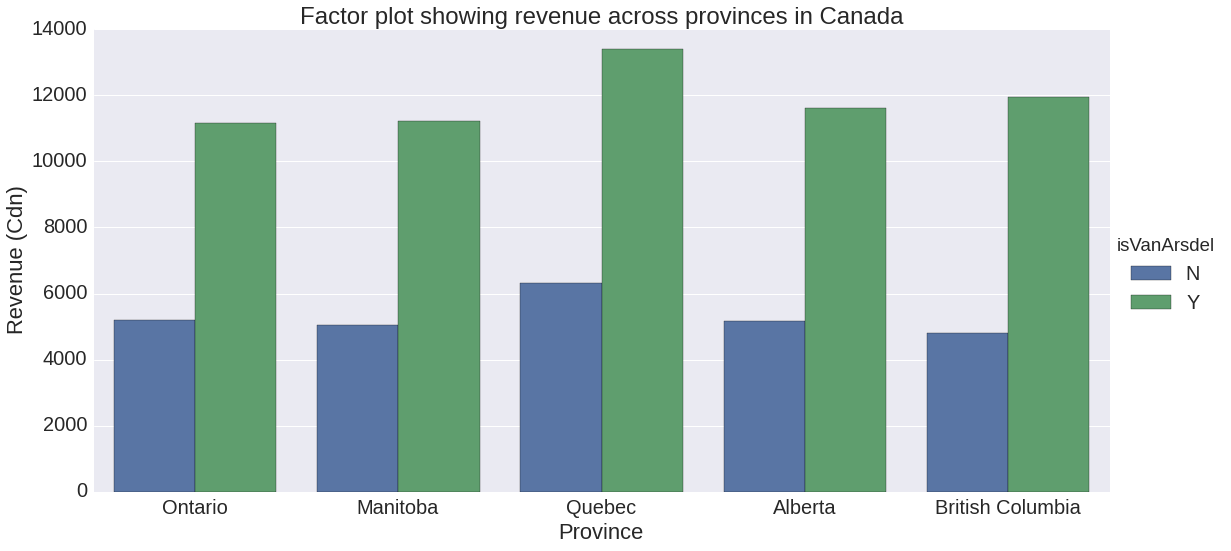

In [209]:

g=sns.factorplot(x="State", y="Revenue",hue="isVanArsdel",data=Sales,kind="bar",size=8, aspect=2,ci=None)
g.set_ylabels("Revenue (Cdn)")
g.set_xlabels("Province")
sns.plt.title('Factor plot showing revenue across provinces in Canada')

we could add confidence intervals to the plot above but for now lets leave it as it is. This can be achieved by chaning ci from None to a value calculated from the dataset or by bootstrapping. This is more of an indepth statistical analysis which at the moment is not important to us. Details of this can be found here http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/ and here http://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

Lets visualize the revenue generated by each segement

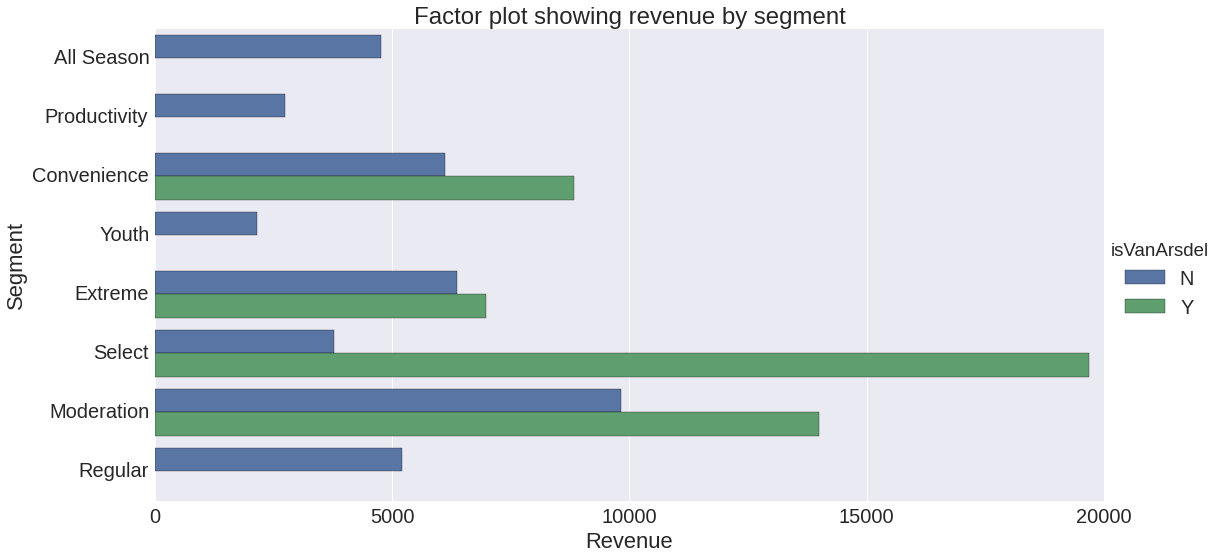

In [223]:
g=sns.factorplot(x="Revenue", y="Segment",hue="isVanArsdel",data=Sales,kind="bar",size=8, aspect=2,orient="h",ci=None)
g.set_ylabels("Segment")
g.set_xlabels("Revenue")
sns.plt.title('Factor plot showing revenue by segment')

The plot above shows that the select and moderation segments generated the most revenue.  This plot summarizes the pivot table we earlier had which grouped the sales/revenue by segment.

Many other pivot tables that group the data in various and their corresponding plots can be made. For example, we can generate a pivot table that will group the data by category. Those tables and graphs are  extrapolations of what we have done already, hence, will not cover them in this tutorial.